In [1]:
import pandas as pd

# data = pd.read_csv("SHB_A-1987-01-02-2023-09-08.csv", sep=";", decimal=",", skiprows=1, encoding="utf-8")

# data.columns
column_order = ['Date', 'Bid', 'Ask', 'Opening price', 'High price', 'Low price', 'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades']
data = pd.read_csv("../../Data/Raw_data/SHB_A-1999-01-06-2024-02-05.csv", sep=";", decimal=",", skiprows=1, usecols=column_order)

## TRANSFORM

,Closing price,Trades,Differenced Closing
Date,,,
1999-01-07,39.111,336,NaN
1999-01-08,38.889,231,-0.222
1999-01-11,37.778,175,-1.111
1999-01-12,36.944,256,-0.834
1999-01-13,35.611,321,-1.333
...,...,...,...
2024-01-29,113.300,5006,-1.100
2024-01-30,113.650,3750,0.350
2024-01-31,112.550,5316,-1.100


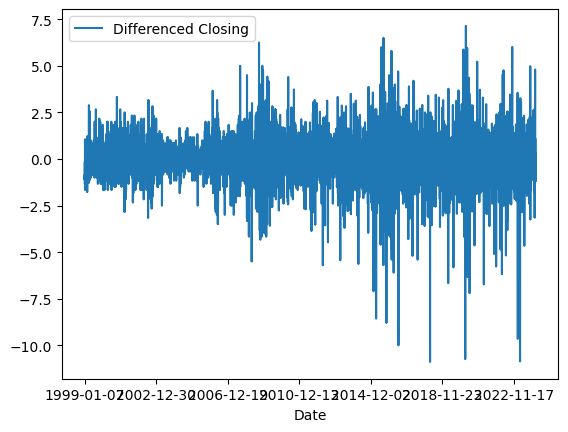

In [2]:
columns_to_drop = ["Bid", "Ask", "Opening price", "Average price"]
data = data.set_index("Date").drop(columns=columns_to_drop)

data = data.dropna(axis=1)

data = data[::-1]


data["Differenced Closing"] = data["Closing price"].diff()
    

data.plot.line(y="Differenced Closing")

data

,Closing price,Trades,Differenced Closing
Date,,,
1999-01-08,38.889,231,-0.222
1999-01-11,37.778,175,-1.111
1999-01-12,36.944,256,-0.834
1999-01-13,35.611,321,-1.333
1999-01-14,35.389,359,-0.222
...,...,...,...
2024-01-29,113.300,5006,-1.100
2024-01-30,113.650,3750,0.350
2024-01-31,112.550,5316,-1.100


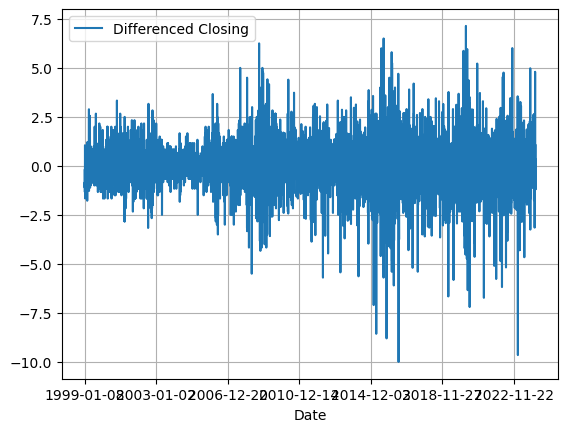

In [3]:
# Set a threshold for drastic price changes
drastic_change_threshold = 10  # You can adjust this threshold based on your data

# Create a boolean mask for rows with drastic price changes
mask = abs(data["Differenced Closing"]) <= drastic_change_threshold

# Apply the mask to filter out rows with drastic changes
data = data[mask]

data.plot.line(grid=True, y="Differenced Closing")
# Display the filtered data
data

In [4]:
import numpy as np

SHORT_CHANGE_HORIZON = 5
MID_CHANGE_HORIZON = 20
LONG_CHANGE_HORIZON = 50
FACTOR = 0.0135 # Profit to define target 0.014

data["Short_day_change"] = (data["Closing price"] - data["Closing price"].shift(SHORT_CHANGE_HORIZON)) / SHORT_CHANGE_HORIZON
data["Mid_day_change"] = (data["Closing price"] - data["Closing price"].shift(MID_CHANGE_HORIZON)) / MID_CHANGE_HORIZON
data["Long_day_change"] = (data["Closing price"] - data["Closing price"].shift(LONG_CHANGE_HORIZON)) / LONG_CHANGE_HORIZON


data["t+1"] = data["Closing price"].shift(-1)
data["t+2"] = data["Closing price"].shift(-2)
data["t+3"] = data["Closing price"].shift(-3)
data["t+4"] = data["Closing price"].shift(-4)
data["t+5"] = data["Closing price"].shift(-5)

conditions = [
    (data["t+1"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+2"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+3"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+4"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+5"] > (data["Closing price"] * (1+FACTOR)))
]

choice = [1]
data["Target"] = np.select(conditions, choice, 0)

data = data.dropna()

data["Target"].value_counts()

/var/folders/20/ltk7v1c11s5306nh2wl9r50r0000gn/T/ipykernel_21910/1330674236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Short_day_change"] = (data["Closing price"] - data["Closing price"].shift(SHORT_CHANGE_HORIZON)) / SHORT_CHANGE_HORIZON
/var/folders/20/ltk7v1c11s5306nh2wl9r50r0000gn/T/ipykernel_21910/1330674236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Mid_day_change"] = (data["Closing price"] - data["Closing price"].shift(MID_CHANGE_HORIZON)) / MID_CHANGE_HORIZON
/var/folde

0    3136
1    3111
Name: Target, dtype: int64

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5368 - loss: 0.6867 - val_accuracy: 0.4870 - val_loss: 0.7094
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5468 - loss: 0.6768 - val_accuracy: 0.5130 - val_loss: 0.7064
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 0.6770 - val_accuracy: 0.5350 - val_loss: 0.6977
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 0.6754 - val_accuracy: 0.5180 - val_loss: 0.7152
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 0.6752 - val_accuracy: 0.5300 - val_loss: 0.7085
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5726 - loss: 0.6752 - val_accuracy: 0.5150 - val_loss: 0.7282
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5688 - loss: 0.6693 - val_accuracy: 0.5360 - val_loss: 0.7101
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5651 - loss: 0.6753 - val_accuracy: 0.

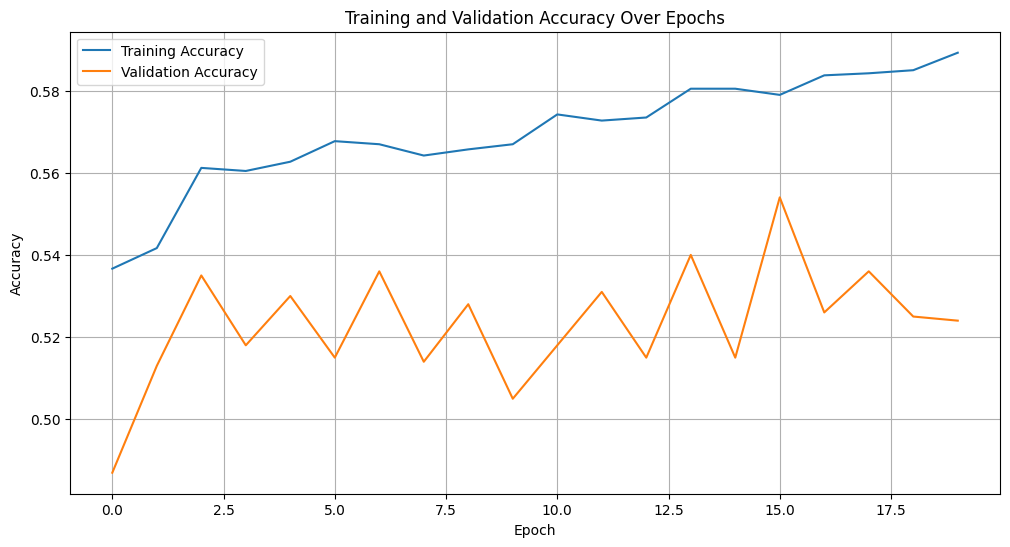

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.40      0.44       610
           1       0.51      0.59      0.54       640

    accuracy                           0.50      1250
   macro avg       0.50      0.50      0.49      1250
weighted avg       0.50      0.50      0.49      1250

Confusion Matrix:
 [[247 363]
 [265 375]]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf


TRAIN_RATIO = 0.8
split_ix = int(len(data) * TRAIN_RATIO)

# Split the data into training and testing sets
x = data[["Differenced Closing", "Short_day_change", "Mid_day_change", "Long_day_change"]].values
y = data["Target"].values

X_train, X_test = x[:split_ix], x[split_ix:]
y_train, y_test = y[:split_ix], y[split_ix:]

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
